# Chapter 3 Exercises

In [1]:
import pyro
import pyro.distributions as dist
import torch
import pyro.ops.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pyro.set_rng_seed(100)

In [3]:
def get_posterior(N, k, p_grid, prior):

    likelihood = (
        dist.Binomial(total_count=float(N), probs=p_grid)
        .log_prob(torch.tensor(float(k)))
        .exp()
    )

    posterior = likelihood * prior
    posterior = posterior / torch.sum(posterior)

    return posterior

In [4]:
def get_posterior_samples(p_grid, posterior, sample_size):
    
    samples = dist.Empirical(p_grid, posterior.log()).sample(
        torch.Size([sample_size])
    )
    
    return samples

In [5]:
def get_prediction_samples(N, posterior_samples, sample_size):

    prediction_samples = dist.Binomial(
        total_count=float(N), probs=posterior_samples
    ).sample(torch.Size([sample_size]))

    return prediction_samples


<AxesSubplot:ylabel='Count'>

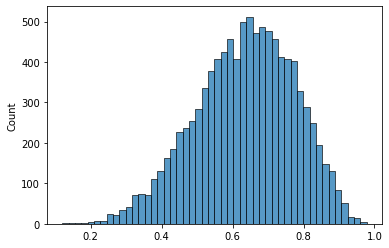

In [6]:
n = 1000
p_grid = torch.linspace(0.0, 1.0, n)
prior = torch.tensor(1.0).repeat(n)
posterior = get_posterior(9, 6, p_grid, prior)
posterior_samples = get_posterior_samples(p_grid, posterior, 10000)


fig, ax = plt.subplots()
sns.histplot(
    posterior_samples, ax=ax
)

## 3E1

In [7]:
torch.mean((posterior_samples < 0.2).float())

tensor(0.0010)

## 3E2

In [8]:
torch.mean((posterior_samples > 0.8).float())

tensor(0.1166)

## 3E3

In [9]:
torch.mean(((posterior_samples > 0.2) & (posterior_samples < 0.8)).float())

tensor(0.8824)

## 3E4

In [10]:
stats.quantile(posterior_samples, 0.2)

tensor(0.5155)

## 3E5

In [11]:
stats.quantile(posterior_samples, 0.8)

tensor(0.7588)

## 3E6

In [12]:
stats.hpdi(posterior_samples, prob=0.66)

tensor([0.5155, 0.7858])

## 3E7

In [13]:
stats.quantile(posterior_samples, [0.17, 0.83])

tensor([0.4965, 0.7718])

## 3M1

<AxesSubplot:ylabel='Count'>

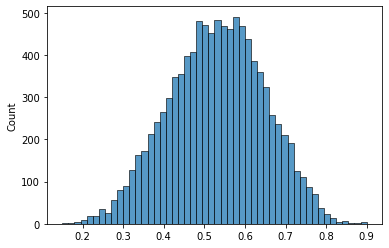

In [14]:
n = 1000
p_grid = torch.linspace(0.0, 1.0, n)
prior = torch.tensor(1.0).repeat(n)
posterior = get_posterior(15, 8, p_grid, prior)
posterior_samples = get_posterior_samples(p_grid, posterior, 10000)


fig, ax = plt.subplots()
sns.histplot(
    posterior_samples, ax=ax
)

In [15]:
posterior_samples.shape

torch.Size([10000])

## 3M2

In [16]:
stats.hpdi(posterior_samples, prob=0.9)

tensor([0.3383, 0.7227])

## 3M3

<AxesSubplot:ylabel='Count'>

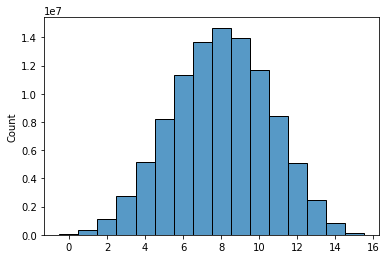

In [17]:
prediction_samples = get_prediction_samples(15, posterior_samples, 10000)

fig, ax = plt.subplots()
sns.histplot(
    torch.flatten(prediction_samples), ax=ax, discrete=True
)

In [18]:
torch.mean((prediction_samples == 8).float())

tensor(0.1469)

## 3M4

<AxesSubplot:ylabel='Count'>

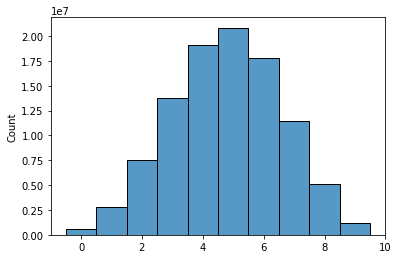

In [19]:
prediction_samples = get_prediction_samples(9, posterior_samples, 10000)

fig, ax = plt.subplots()
sns.histplot(
    torch.flatten(prediction_samples), ax=ax, discrete=True
)

In [20]:
torch.mean((prediction_samples == 6).float())

tensor(0.1777)

## 3M5

<AxesSubplot:ylabel='Count'>

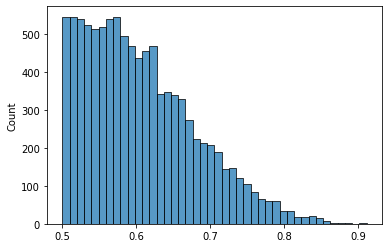

In [21]:
n = 1000
p_grid = torch.linspace(0.0, 1.0, n)
prior = torch.tensor([0.0 if p < 0.5 else 2.0 for p in p_grid])
posterior = get_posterior(15, 8, p_grid, prior)
posterior_samples = get_posterior_samples(p_grid, posterior, 10000)


fig, ax = plt.subplots()
sns.histplot(
    posterior_samples, ax=ax
)

In [22]:
stats.hpdi(posterior_samples, prob=0.9)

tensor([0.5005, 0.7127])

<AxesSubplot:ylabel='Count'>

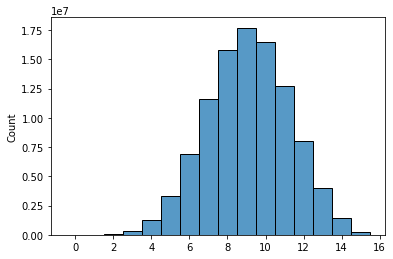

In [23]:
prediction_samples = get_prediction_samples(15, posterior_samples, 10000)

fig, ax = plt.subplots()
sns.histplot(
    torch.flatten(prediction_samples), ax=ax, discrete=True
)

In [24]:
torch.mean((prediction_samples == 8).float())

tensor(0.1577)

<AxesSubplot:ylabel='Count'>

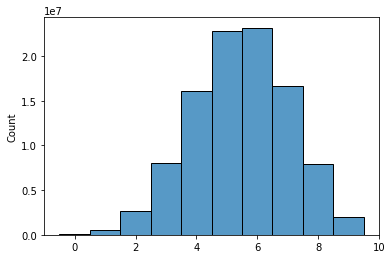

In [25]:
prediction_samples = get_prediction_samples(9, posterior_samples, 10000)

fig, ax = plt.subplots()
sns.histplot(
    torch.flatten(prediction_samples), ax=ax, discrete=True
)

In [26]:
torch.mean((prediction_samples == 6).float())

tensor(0.2318)

- The true value for Earth's proportion of water is `p=0.7`
- This means for `15` tosses a value of `10.5` should be expected and for `9` tosses a value of `6.3` should be expected.
- For the case of a uniform prior the predictive simulation distribution is symmetric and peaks around `8` for `15` tosses and `5` for `9` tosses.
- This corresponds to a `p` value of `0.5333` and `0.5556` respectively.
- For the step prior the predictive simulation distribution is symmetric and peaks around `9` for `15` tosses and `6` for `9` tosses.
- This corresponds to a `p` value of `0.6` and `0.6667` respectively.
- Hence the step prior gives a better estimate of the true value `p=0.7` than the uniform prior.

## 3M6

In [27]:
n = 1000
p_grid = torch.linspace(0.0, 1.0, n)
prior = torch.tensor([0.0 if p < 0.5 else 2.0 for p in p_grid])
sample_size = 10000

pi_width = 1
N = 0
true_p = 0.7
while pi_width > 0.05:
    posterior = get_posterior(N, N*true_p, p_grid, prior)
    posterior_samples = get_posterior_samples(p_grid, posterior, sample_size)
    interval = stats.hpdi(posterior_samples, prob=0.99)
    pi_width = interval[1] - interval[0]
    N=N+1
    
N - 1

2117

In [28]:
birth1 = torch.tensor([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])

birth2 = torch.tensor([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

## 3H1

In [29]:
n = 1000
p_grid = torch.linspace(0.0, 1.0, n)
prior = torch.tensor(1.0).repeat(n)
posterior = get_posterior(len(birth1) + len(birth2), torch.sum(birth1) + torch.sum(birth2), p_grid, prior)

In [30]:
p_grid[torch.argmax(posterior)]

tensor(0.5546)

## 3H2

In [31]:
posterior_samples = get_posterior_samples(p_grid, posterior, 10000)

In [32]:
stats.hpdi(posterior_samples, prob=0.50)

tensor([0.5335, 0.5796])

In [33]:
stats.hpdi(posterior_samples, prob=0.89)

tensor([0.5015, 0.6126])

In [34]:
stats.hpdi(posterior_samples, prob=0.97)

tensor([0.4825, 0.6316])

## 3H3

In [35]:
torch.sum(birth1) + torch.sum(birth2)

tensor(111)

<AxesSubplot:ylabel='Count'>

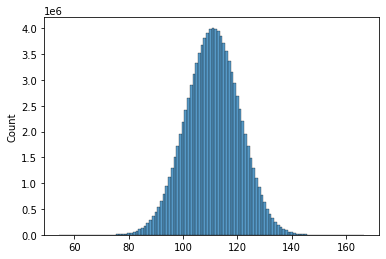

In [36]:
prediction_samples = get_prediction_samples(len(birth1) + len(birth2), posterior_samples, 10000)

fig, ax = plt.subplots()
sns.histplot(
    torch.flatten(prediction_samples), ax=ax, discrete=True
)

The predictive simulation distribution gives a symmetric distribution centred around the true value of the number of boys, `111`. Hence the model fits the data well.

## 3H4

In [37]:
torch.sum(birth1)

tensor(51)

<AxesSubplot:ylabel='Count'>

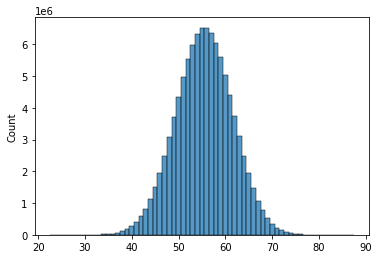

In [38]:
prediction_samples = get_prediction_samples(len(birth1), posterior_samples, 10000)

fig, ax = plt.subplots()
sns.histplot(
    torch.flatten(prediction_samples), ax=ax, discrete=True
)

The predictive simulation distribution gives a symmetric distribution centred around the true value of the number of first births which are boys, `51`. Hence the model fits the data well.

## 3H5

In [39]:
torch.sum(birth2[birth1 == 0])

tensor(39)

<AxesSubplot:ylabel='Count'>

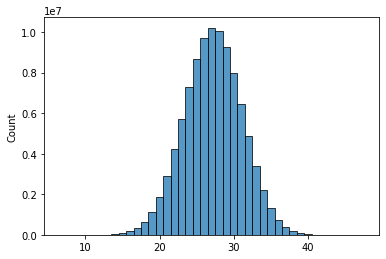

In [40]:
prediction_samples = get_prediction_samples(torch.sum(birth1 == 0), posterior_samples, 10000)

fig, ax = plt.subplots()
sns.histplot(
    torch.flatten(prediction_samples), ax=ax, discrete=True
)

The number of boys born to a second birth given that the first birth is a girl is `39` whilst the model, which assumes that the outcomes of first and second births are independent, is suggesting a distribution which is centred at a value around `27`. This would suggest that the outcomes of the first and second birth are **not** independent and suggests that if first birth is a girl, the probability that the second birth is a boy increases.